## Project title: Movie Recommendation Engine



### Overview :

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and success.

In this Project, we will try and gain some insights using dataset of about 45000 movies with metadata collected from TMDB. Using this data, we will try and answer various questions on how the dataset can be used to predict important feature and also classify if the movie is a hit or not. Another motivation is to build a movie recommendation system.

### Problem Statement :
    
This project is divided into two parts:

#### 1. Analysis and prediction model:

- Exploratory Data Analysis which is performed on Movie Metadata about Movie Revenues, Casts, Crews, Budgets, etc. through the years. 

- Model to classify if a movie will be a success or not. Through this model, we also aim at discovering what features have the most significant impact in determining the success of a movie.

   * A **Classifier** that identifies if a movie will be a hit or will make the producers lose money.


#### 2. Movie Recommender Systems: 
This part is focused around building Content based recommendation engines using the scikit-learn library.
This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.


### Methodology :

The approach is divided into several steps:

**Data Collection:**

The main Movies Metadata file contains information on around 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**Data Wrangling:**

The dataset will be uploaded to a dataframe and explored. Null values were filled in wherever appropriate and polluted values were discarded or wrangled. Further, new features may be created using existing features accordingly.

**EDA:** 

Exploratory Data Analysis is all about getting to know your data. EDA will be used to extract insights and pattern from the various datasets, test business assumptions, generate hypotheses for further analysis. 


**Machine Learning:** 

Gradient Boosting Classifer and other binary classifier algorithms will be compared and then trained on our feature engineered dataset to predict movie success. Their feature importances will be noted to gain insights into what factors influence the revenues of a movie relative to budget.

**Recommendation Systems:**

We are focused around building Content based recommendation engines using the scikit-learn library.

### Detailed description of dataset:

Dataset link : https://www.kaggle.com/rounakbanik/the-movies-dataset/data

movies_metadata.csv: The main Movies Metadata file. Contains information on around 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Understanding the Dataset

The dataset above was obtained through the TMDB API. This section describes the various data cleaning and data wrangling methods applied on the Movie dataset to make it more suitable for further analysis. The movies available in this dataset are in correspondence with the movies that are listed in the **MovieLens Latest Full Dataset** comprising of 26 million ratings on 45,466 movies from 27,000 users, comprises of 24 features as displayed below -



In [3]:
df.shape

(45466, 24)

In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the movie.
* **id:** The ID of the movie.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Most of the features are of string object type, except features like revenue, runtime, vote_average, vote_count are continuous variables. Few features are missing some values which are displayed in the next section -

#### Looking at the null values in dataset

In [6]:
pd.isnull(df).sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

There are a total of **45,466 movies** with **24 features**. Most of the features have very few NaN values (apart from **homepage** , **belongs_to_collection** and **tagline**). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

### Data Wrangling
Let us Identify the features that are not useful to us.
Dropping columns :

- imdb_id 
- homepage
- overview
- original_title
- poster_path
- tagline
- video


The original title refers to the title of the movie in the native language in which the movie was shot. As such, we will prefer using the translated name in this analysis and hence, will drop the original titles altogether. 

We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so.

#### Original_title

In [7]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [8]:
df = df.drop('original_title', axis=1)
df = df.drop(['imdb_id','homepage','poster_path','tagline','video'], axis=1)

#### Adult
For the feature "adult", we will check if this helps in our analysis, by looking at its distribition, looking at the column the value is binary. 

In [9]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [10]:
df = df.drop('adult', axis=1)

There are only few adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

#### Revenue

In [11]:
df[df['revenue'] == 0].shape

(38052, 17)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [12]:
df['revenue'] = df['revenue'].replace(0, np.nan)

#### Budget

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [13]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 17)

#### Feature Construction:

We will construct two very important features:

* **year:** The year in which the movie was released.
* **return:** The ratio of revenue to budget.

The **return** feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a movie with certain budget was a success or not. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

#### Return

In [14]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 18)

We have close to 4000 movies for which we have data on revenue and budget ratio.
#### Year

In [15]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [16]:
df = df.drop('release_date', axis=1)

We can drop release date as new feature YEAR as the year the movie was released.

We consider taking a sample of our data as an easy way to have a quick look, after dropping some irrelevant features.

In [17]:
df.sample()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,return,year
15156,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",190906,en,"While working at a circus, a man (Herbert Lom)...",0.192959,[{'name': 'Warner Brothers-First National Prod...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaN,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dark Tower,7.0,2.0,NaN,1943


There are some features which are list of dictionaries with name and id as keys of dictionary. We need to convert them into individual values. one problem with these features is the python dictionary is being stored as string in some of the features. So, we need to use ast.literal_eval to convert those strings to a Python dictionary.

In [18]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['belongs_to_collection'] = df['belongs_to_collection'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [19]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,return,year
0,[],30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,[Pixar Animation Studios],[United States of America],373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0,12.451801,1995
1,[],65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0,4.043035,1995
2,[],NaN,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],NaN,101.0,[English],Released,Grumpier Old Men,6.5,92.0,NaN,1995
3,[],16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,[English],Released,Waiting to Exhale,6.1,34.0,5.090760,1995
4,[],NaN,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.38752,"[Sandollar Productions, Touchstone Pictures]",[United States of America],76578911.0,106.0,[English],Released,Father of the Bride Part II,5.7,173.0,NaN,1995


## Exploratory Data Analysis

In this section, the various insights produced through descriptive statistics and data visualisation is presented.


### Title and Overview Wordclouds 

Let's consider certain words that figure more often in Movie Titles and Movie overviews and see the words which are considered more potent and considered more worthy of a title.

In [20]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

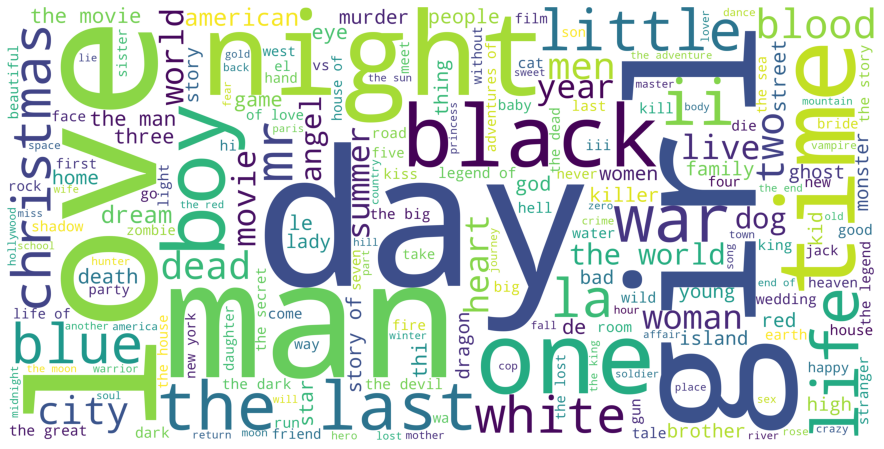

In [21]:
title_wordcloud = WordCloud(stopwords= STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus.lower())
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The words day, love & girl are the most commonly used word in movie titles. Day, man, boy and night are also among the most commonly occuring words.

In [22]:
# removing stopwords from overview_corpus
overview_corpus = ' '.join([word for word in overview_corpus.split() if word not in STOPWORDS])

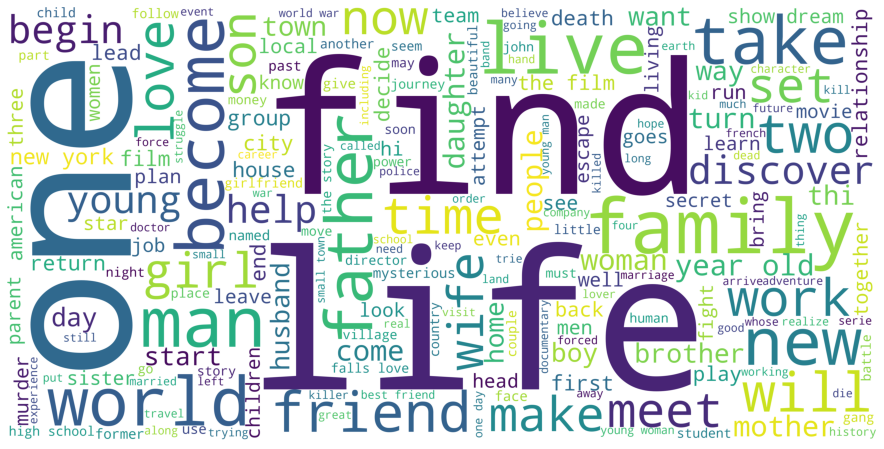

In [23]:
overview_wordcloud = WordCloud(stopwords= STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus.lower())
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. Family and Find are also popular in Movie overviews. Together with world, one and Friend, these wordclouds give us a pretty good idea of the most popular themes present in movies.

#### Original Language
Let us observe the languages of the movies in our dataset. Let us see what the major languages represented are.

In [24]:
df['original_language'].nunique()

92

In [25]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


There are over 92 languages represented in our dataset.

Unsupringly, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively.

Let us represent the most popular languages (apart from English) in the form of a bar plot.

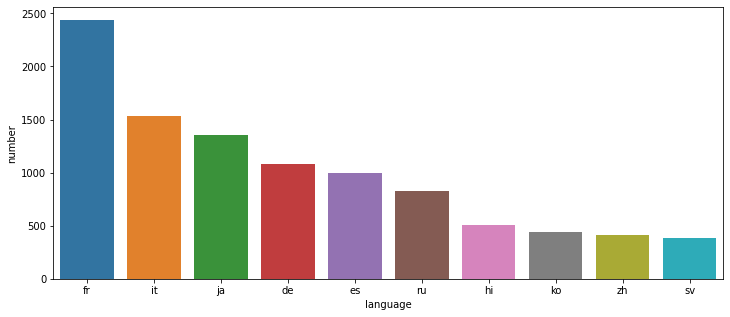

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

As mentioned earlier, French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the majority as far as Asian Languages are concerned.

#### Popularity, Vote Average and Vote Count
In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

In [27]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
    
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [28]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

The Popularity score seems to be an extremely skewed quantity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

##### Most Popular Movies by Popularity Score¶

In [29]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.

In [30]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,075. TMDB Votes, therefore, are not as potent and suggestive as its IMDB Counterpart. Nevertheless, let us check which the most voted on movies on the website are.

#### Most Voted on Movies

In [31]:
df[['title','vote_count','year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012



Inception and The Dark Knight, two critically acclaimed and commercially successful movies figure at the top of our chart.

#### Most Critically Acclaimed Movies

In [32]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quanitties? Let us visualise their relationship in the form of a scatterplot.

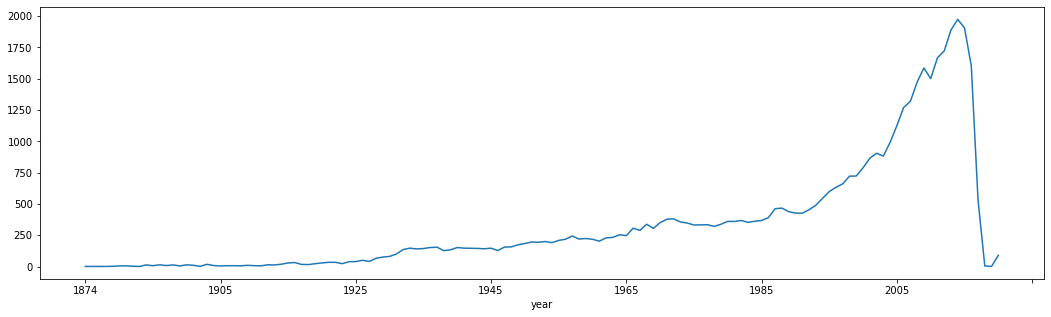

In [33]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies starting the 1990s decade. However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

#### Budget
We expect budgets to be a skewed quantity and also heavily influenced by inflation. Nevertheless, it would be interesting to gather as much insights as possible from this quantity as budget is often a critical feature in predicting movie revenue and success. Let us gather the summary statistics for our budget.

In [34]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [35]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 18)

In [36]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The mean budget of a film is 21.6 million dollars whereas the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers.

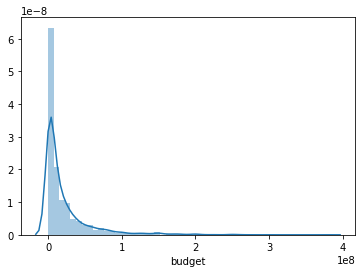

In [37]:
sns.distplot(df[df['budget'].notnull()]['budget'])

This is right skewed suggesting the mean value is influenced by outliers.

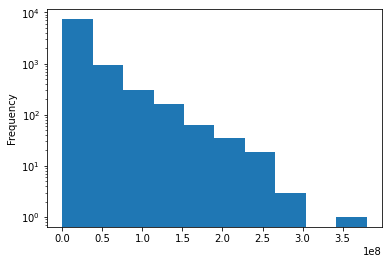

In [38]:
df['budget'].plot(logy=True, kind='hist')

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars.

#### Revenue
The revenue is probably the most important numeric quantity associated with a movie. We will try to predict the revenue for movies given a set of features in a later section. The treatment of revenue will be very similar to that of budget and we will once again begin by studying the summary statistics.

In [39]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

We observe that min,25%,median and 75% are coming to be 0.00 dollars. We need to check columns where revenue is 0 .

In [40]:
df[df['revenue'] == 0].shape

(0, 18)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 movies.

In [41]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is 6.87 million dollars whereas the median gross is much lower at 16.8 million dollars, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is just 1 dollar whereas the highest grossing movie of all time has raked in an astonishing *2.78 billion dollars.

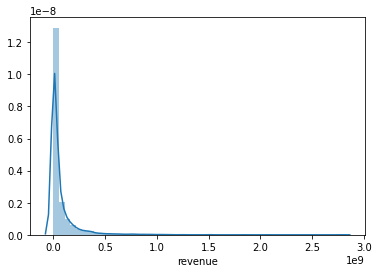

In [42]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget.

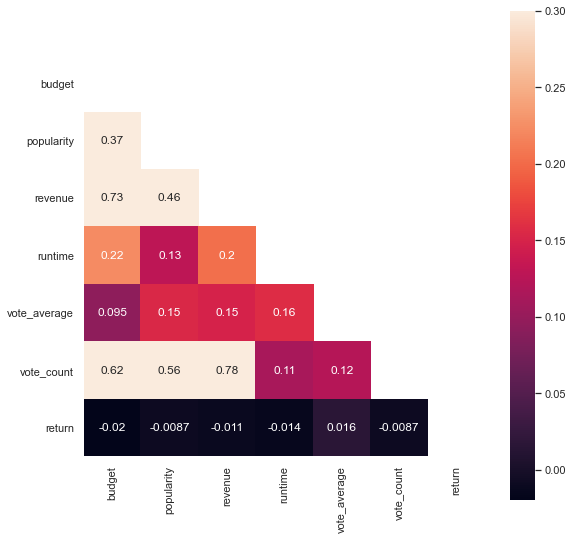

In [43]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

The revenue and budget are found to be strongly correlated . Also, Revenue and vote_count are highly correlated with pearson correlation as 0.81. One intersting observation is vote_count comes out be an important factor for both budget and revenue.

In [44]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

gen_df = df.drop('genres', axis=1).join(s)

In [45]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


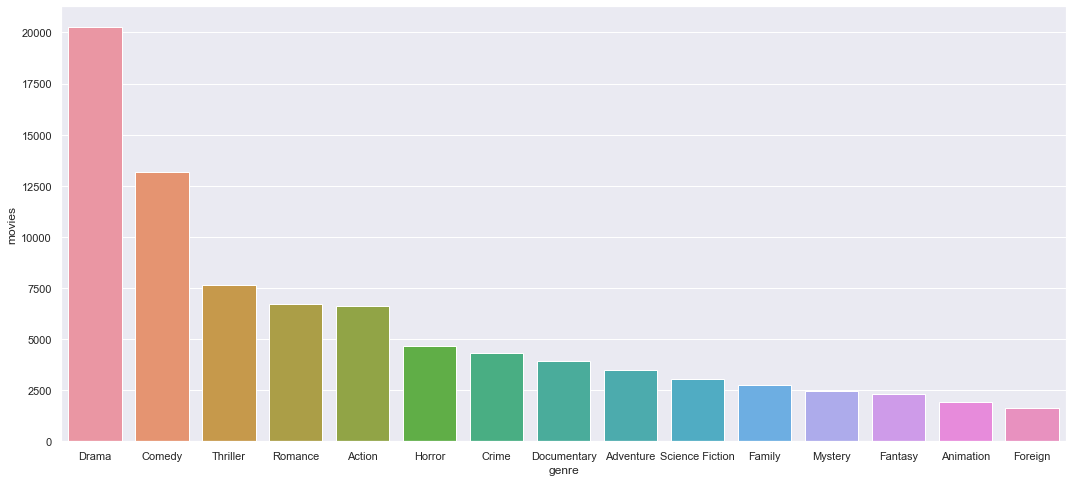

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

#### Algorithms intend to apply: regression or classification task? what algorithms planned to use (at least 3 algorithms)?¶

As we have planned to build Classifier and recommendation engines-


1. Classifier that identifies if a movie will be a hit or will make the producers lose money.

Classifiers : Random forest classifier, voting Classifier and Bagging classifier

What are the factors that influence whether a movie will be able to recoup its investments - this question can be answered by building a binary classifier that predicts if a movie will make a profit or a loss. We should also be able to see the significant feature/s identified by our classifier. 


##### Recommender System:

This part is focused around building Content based recommendation engines using the scikit-learn library. This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.

- Finding the similarity :

We know that our recommendation engine will be content based. So, we need to find similar movies to a given movie and then recommend those similar movies to the user.

we need to find a way to represent these texts as vectors. The TfidfVectorizer() class from sklearn.feature_extraction.text library can do this for us. We need to import this library before we can create a new TfidfVectorizer() object.

Now, we need to find cosine similarity between these vectors to find out how similar they are from each other. We can calculate this using cosine_similarity() function from sklearn.metrics.pairwise library.

- Building content based recommendation system:

Now using cosine similarity scores we will create recommendation system.



#### How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

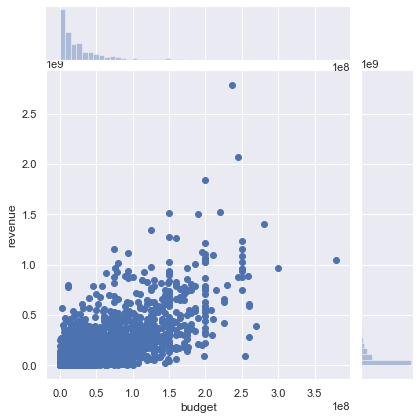

In [47]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

Budget and Revenue are highly correlated 

### Classification: Predicting Movie Sucess

In [48]:
cls = df[df['return'].notnull()]
cls.shape

(5381, 18)

In [49]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title', 'vote_average', 'vote_count', 'return', 'year'],
      dtype='object')

In [50]:
cls = cls.drop(['id', 'overview', 'status', 'revenue'], axis=1)

In [51]:
cls.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count,return,year
0,[],30000000.0,"[Animation, Comedy, Family]",en,21.946943,[Pixar Animation Studios],[United States of America],81.0,[English],Toy Story,7.7,5415.0,12.451801,1995
1,[],65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,"[English, Français]",Jumanji,6.9,2413.0,4.043035,1995
3,[],16000000.0,"[Comedy, Drama, Romance]",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,[English],Waiting to Exhale,6.1,34.0,5.090760,1995
5,[],60000000.0,"[Action, Crime, Drama, Thriller]",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],170.0,"[English, Español]",Heat,7.7,1886.0,3.123947,1995
8,[],35000000.0,"[Action, Adventure, Thriller]",en,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],106.0,[English],Sudden Death,5.5,174.0,1.838576,1995


Let us convert our **return** feature into a binary variable that will serve as our classes: **0** indicating a flop and **1** indicating a hit.

In [52]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)

In [53]:
cls['return'].value_counts()

1    3776
0    1605
Name: return, dtype: int64

In [54]:
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)
genres_train = gen_cls['genre'].drop_duplicates()

In [55]:
def classification_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x))
    df = df.drop('title', axis=1)
    df = df.drop('budget', axis=1)
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [56]:
final_df = classification_engineering(cls)

In [57]:
final_df.columns

Index(['belongs_to_collection', 'genres', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'vote_average',
       'vote_count', 'return', 'year', 'is_Animation', 'is_Comedy',
       'is_Family', 'is_Adventure', 'is_Fantasy', 'is_Drama', 'is_Romance',
       'is_Action', 'is_Crime', 'is_Thriller', 'is_History',
       'is_Science Fiction', 'is_Mystery', 'is_Horror', 'is_War', 'is_Foreign',
       'is_Documentary', 'is_Western', 'is_Music', 'is_nan', 'is_TV Movie',
       'is_english'],
      dtype='object')

In [58]:
final_df.sample()

,belongs_to_collection,genres,popularity,production_companies,production_countries,runtime,spoken_languages,vote_average,vote_count,return,...,is_Mystery,is_Horror,is_War,is_Foreign,is_Documentary,is_Western,is_Music,is_nan,is_TV Movie,is_english
37062,1,2,0.328668,1,1,141.0,1,5.6,5.0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
final_df.isnull().sum()

belongs_to_collection    0
genres                   0
popularity               0
production_companies     0
production_countries     0
runtime                  0
spoken_languages         0
vote_average             0
vote_count               0
return                   0
year                     0
is_Animation             0
is_Comedy                0
is_Family                0
is_Adventure             0
is_Fantasy               0
is_Drama                 0
is_Romance               0
is_Action                0
is_Crime                 0
is_Thriller              0
is_History               0
is_Science Fiction       0
is_Mystery               0
is_Horror                0
is_War                   0
is_Foreign               0
is_Documentary           0
is_Western               0
is_Music                 0
is_nan                   0
is_TV Movie              0
is_english               0
dtype: int64

#### Stratify shuffle split

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(final_df, final_df["return"]):
    strat_train_set = final_df.iloc[train_index]
    strat_test_set = final_df.iloc[test_index]

print("Train set", strat_train_set.shape)
print("Test set", strat_test_set.shape)


Train set (4304, 33)
Test set (1077, 33)


In [61]:
train_set = strat_train_set.drop("return" , axis=1) # drop labels for training set
train_label = strat_train_set["return"].copy()

In [62]:
train_set.head()

,belongs_to_collection,genres,popularity,production_companies,production_countries,runtime,spoken_languages,vote_average,vote_count,year,...,is_Mystery,is_Horror,is_War,is_Foreign,is_Documentary,is_Western,is_Music,is_nan,is_TV Movie,is_english
2917,1,2,11.179855,1,1,83.0,1,7.0,1155.0,1973,...,0,0,0,0,0,0,0,0,0,1
3979,1,1,10.421679,1,1,85.0,1,7.3,913.0,1981,...,0,1,0,0,0,0,0,0,0,1
43691,1,2,24.317924,2,1,101.0,1,5.6,336.0,2017,...,0,0,0,0,0,0,0,0,0,1
17201,1,5,2.382068,2,1,95.0,2,6.3,26.0,2009,...,1,0,0,0,0,0,0,0,0,0
8469,1,5,2.090588,1,1,107.0,1,7.3,22.0,1950,...,0,0,0,0,0,1,1,0,0,1


In [63]:
train_set.columns

Index(['belongs_to_collection', 'genres', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'vote_average',
       'vote_count', 'year', 'is_Animation', 'is_Comedy', 'is_Family',
       'is_Adventure', 'is_Fantasy', 'is_Drama', 'is_Romance', 'is_Action',
       'is_Crime', 'is_Thriller', 'is_History', 'is_Science Fiction',
       'is_Mystery', 'is_Horror', 'is_War', 'is_Foreign', 'is_Documentary',
       'is_Western', 'is_Music', 'is_nan', 'is_TV Movie', 'is_english'],
      dtype='object')

In [64]:
test_set = strat_test_set.drop("return" , axis=1) # drop labels for training set
test_label = strat_test_set["return"].copy()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn import grid_search
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score

#### Random forest classifier:

The algorithm will perform the following steps:

•	Drawing of a random bootstrap sample of size n.

•	Growing a decision tree from the bootstrap sample. At each node: Therewill be randomly selected d features without replacement and the node will be splitted maximizing the information gain.

•	The previous process willbe repeated k times.

•	Agreggating the predicition done by each tree, asigning the class label by majority vote.
The important hyperparameters are –

•	max_depth: the longest path between the root node and the leaf node

•	min_sample_split: the minimum required number of observations

•	max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree

•	min_samples_leaf: minimum number of samples that should be present in the leaf node after splitting a node.

•	n_estimators: number of trees

•	max_sample :  determines what fraction of the original dataset is given to any individual tree.

•	max_features: number of maximum features provided to each tree in a random forest.


For the selection of hyperparameters, instead of tuning them manually we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [78]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics

In [66]:
# Create the parameter grid based on the results of random search
'''
param_grid = {
   "criterion":["gini","entropy"],
   "max_samples":[100,200,300,400,500],
   'n_estimators': [100, 200, 300, 400,500],
   "class_weight" :["balanced", "balanced_subsample", None]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)
best_model=grid_search.fit(train_set, train_label)'''


'\nparam_grid = {\n   "criterion":["gini","entropy"],\n   "max_samples":[100,200,300,400,500],\n   \'n_estimators\': [100, 200, 300, 400,500],\n   "class_weight" :["balanced", "balanced_subsample", None]\n}\nrf = RandomForestClassifier()\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid)\nbest_model=grid_search.fit(train_set, train_label)'

In [67]:
#grid_search.best_params_

#### Load random forest model in pickle file

In [69]:
filenamerf = 'random forest_model.pkl'
#pickle.dump(best_model, open(filenamerf, 'wb'))

In [70]:
loaded_model = pickle.load(open(filenamerf, 'rb'))
y_pred_rf = loaded_model.predict(test_set)
accuracy_score(test_label, y_pred_rf)

0.7678737233054782

In [79]:
confusion_matrix(test_label, y_pred_rf)

array([[142, 179],
       [ 71, 685]])

In [82]:
print("precision is ",precision_score(test_label, y_pred_rf))

precision is  0.7928240740740741


In [81]:
print("recall is ",recall_score(test_label, y_pred_rf))

recall is  0.906084656084656


In [83]:
print("F1 is ",f1_score(test_label, y_pred_rf))

F1 is  0.8456790123456789


Hyperparameter Tuning:

•	n_estimators = number of trees in the forest

•	max_features = max number of features considered for splitting a node

•	max_depth = max number of levels in each decision tree

•	min_samples_split = min number of data points placed in a node before the node is split

•	min_samples_leaf = min number of data points allowed in a leaf node

•	bootstrap = method for sampling data points (with or without replacement)

After GridsearchCV, best parameter is coming to be max_samples: 500 and n_estimators :300.
Also, the accuracy after tuning bagging classifier is around 77%.


#### Voting classifier:
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm. It is a way to create a better classifier by aggregating the predictions of each classifier and predict the class that gets the most votes.

Consider three Classifiers: logistic regression, a RandomForestClassifier, and SVC classifier. Models are pitted against each other and selected upon best performance by voting using the ‘VotingClassifier’ Class from sklearn.ensemble.

In [71]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(train_set, train_label)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [72]:
filenamehardvoting = 'hard_voting.pkl'
#pickle.dump(voting_clf, open(filenamehardvoting, 'wb'))

In [73]:
loaded_model_vs = pickle.load(open(filenamehardvoting, 'rb'))
y_pred_vh = loaded_model_vs.predict(test_set)
accuracy_score(test_label, y_pred_vh)

0.755803156917363

In [84]:
confusion_matrix(test_label, y_pred_vh)

array([[100, 221],
       [ 42, 714]])

In [85]:
print("precision is ",precision_score(test_label, y_pred_vh))

precision is  0.7636363636363637


In [86]:
print("recall is ",recall_score(test_label, y_pred_vh))

recall is  0.9444444444444444


In [87]:
print("F1 is ",f1_score(test_label, y_pred_vh))

F1 is  0.8444707273802483


In [74]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf_soft.fit(train_set, train_label)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [75]:
filenamesoftvoting = 'softvoting.pkl'
#pickle.dump(voting_clf_soft, open(filenamesoftvoting, 'wb'))

In [76]:
loaded_model_v = pickle.load(open(filenamesoftvoting, 'rb'))
y_pred_v = loaded_model_v.predict(test_set)
accuracy_score(test_label, y_pred_v)

0.7632311977715878

In [88]:
confusion_matrix(test_label, y_pred_v)

array([[162, 159],
       [ 96, 660]])

In [89]:
print("precision is ",precision_score(test_label, y_pred_v))

precision is  0.8058608058608059


In [90]:
print("recall is ",recall_score(test_label, y_pred_v))

recall is  0.873015873015873


In [91]:
print("F1 is ",f1_score(test_label, y_pred_v))

F1 is  0.8380952380952381


In [77]:
#soft classification
for clf in (log_clf, rnd_clf, svm_clf, voting_clf_soft):
    clf.fit(train_set, train_label)
    y_pred = clf.predict(test_set)
    print(clf.__class__.__name__, accuracy_score(test_label, y_pred))

LogisticRegression 0.7381615598885793
RandomForestClassifier 0.7576601671309192
SVC 0.7019498607242339
VotingClassifier 0.7650882079851439


In [92]:
#hard classification
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(train_set, train_label)
    y_pred = clf.predict(test_set)
    print(clf.__class__.__name__, accuracy_score(test_label, y_pred))

LogisticRegression 0.7381615598885793
RandomForestClassifier 0.7650882079851439
SVC 0.7019498607242339
VotingClassifier 0.7493036211699164


#### Bagging Classifier
Approach to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging.  Bagging allows training instances to be sampled several times for the same predictor. Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

The Bagging Classifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a predict_proba() method), which is the case with Decision Tree classifiers.


In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
'''bag = BaggingClassifier(RandomForestClassifier(random_state=9), n_estimators=100, max_samples=300, bootstrap=True, random_state=9)
bag.fit(train_set, train_label)'''


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [94]:
filenamebg = 'bagging_model_withoutht.pkl'
#pickle.dump(bag, open(filenamebg, 'wb'))

In [95]:
loaded_model = pickle.load(open(filenamebg, 'rb'))
y_pred_b = loaded_model.predict(test_set)
accuracy_score(test_label, y_pred_b)

0.7576601671309192

In [96]:
confusion_matrix(test_label, y_pred_b)

array([[106, 215],
       [ 46, 710]])

In [97]:
print("precision is ",precision_score(test_label, y_pred_b))

precision is  0.7675675675675676


In [98]:
print("recall is ",recall_score(test_label, y_pred_b))

recall is  0.9391534391534392


In [99]:
print("F1 is ",f1_score(test_label, y_pred_b))

F1 is  0.844735276621059


#### Hypertuning of bagging classifier:

In [ ]:
'''param_grid = {
    "n_estimators":[100,50,150],
    "max_samples":[100,200,300],
    'n_estimators': [100, 200],
}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(random_state=45)),
                   param_grid)
best_model=clf.fit(train_set, train_label)'''

In [ ]:
'''clf.best_params_'''

In [100]:
filenamebg = 'bagging_model.pkl'
#pickle.dump(best_model, open(filenamebg, 'wb'))

In [101]:
#with hypertuning
loaded_model = pickle.load(open(filenamebg, 'rb'))
y_pred_bh = loaded_model.predict(test_set)
accuracy_score(test_label, y_pred_bh)

0.7576601671309192

In [102]:
confusion_matrix(test_label, y_pred_bh)

array([[106, 215],
       [ 46, 710]])

In [103]:
print("precision is ",precision_score(test_label, y_pred_bh))

precision is  0.7675675675675676


In [104]:
print("recall is ",recall_score(test_label, y_pred_bh))

recall is  0.9391534391534392


In [105]:
print("F1 is ",f1_score(test_label, y_pred_bh))

F1 is  0.844735276621059



|  Model                  |  Accuracy              |  Precision              |  Recall                |  F1                    |
|-------------------------|------------------------|-------------------------|------------------------|-------------------------
| Random Forest           |    0.748               | 0.792                   | 0.90                   |0.845                   |
| Bagging classifier      |    0.757               | 0.767                   | 0.93                   |0.844                   |
| Bagging_Hypertuning     |    0.757               | 0.767                   | 0.93                   |0.844                   |
| Hard voting classifier  |    0.755               | 0.763                   |0.944                   |0.844                   |
| Soft voting classifier  |    0.763               | 0.80                    |0.873                   |0.838                   |

Soft Voting classifier performed best amongst all. 

#### Applications –

 


	
Movie classification can be used to classify the movie success, can also extend its application in classifying the TV series, documentaries etc. 
	Content-based recommendation can be used to recommend books and articles to the Users


 

 

#### Future scope


	
Collecting user reviews from many possible social forums so we can consider the reviews of more people as possible to increase the accuracy of classification.
	Adding tags to the movie like based on genre, production company, cast and crew can increase performance of content-based recommender.
	Implementation of collaboration and hybrid recommender